In [3]:
# Eric Pulick CS760 HW4
import numpy as np
import matplotlib.pyplot as plt
import itertools

def readfile(fp):
    with open(fp) as f:
        raw=f.read()
    char_count = len(raw)
    
    ref_char = ['a','b','c','d','e','f','g','h',
                'i','j','k','l','m','n','o','p',
                'q','r','s','t','u','v','w','x',
                'y','z',' ']
    x = np.empty(len(ref_char))
    for i,ch in enumerate(ref_char):
        x[i]=raw.count(ch)
    y = fp.split('/')[1][0]
    return x,y

def build_model(train_num):
    prefix = "languageID/"
    train_label = ['e','j','s']
    x_list = []
    train_y = []
    for label in train_label:
        for num in train_num:
            fp = prefix+label+str(num)+".txt"
            x,y = readfile(fp)
            x_list.append(x)
            train_y.append(y)
    train_x = np.stack(x_list)
    return train_x,train_y

def calc_probs(train_x,train_y,param):
    prior = np.empty(3)
    class_cond = np.empty((3,27))
    n = len(train_y)
    for i,label in enumerate(['e','j','s']):
        #print(label)
        prior[i] = (train_y.count(label)+param)/(n+3*param)
        locs = np.where(np.array(train_y)==label)[0]
        #print(locs)
        subset_x = train_x[locs]
        #print(subset_x)
        #print(np.sum(subset_x,axis=0))
        #print(np.sum(subset_x))
        class_cond[i] = (np.sum(subset_x,axis=0)+param)/(np.sum(subset_x)+27*param)
    return prior,class_cond

def make_pred(prior,class_cond,x):
    x_given_y = np.empty(3)
    for i in range(3):
        logs = np.log(class_cond[i])
        x_given_y[i]=np.sum(np.multiply(logs,x))
    posterior = np.log(prior)+x_given_y
    #print("Posterior: ",posterior)
    pred = np.argmin(-1*posterior)
    #print("argmin: ",np.argmin(-1*posterior))
    return pred

def run_test(prior,class_cond):
    translate = {"e":0,"j":1,"s":2}
    test_num = list(range(10,20))   
    test_label = ['e','j','s']
    prefix = "languageID/"
    cm = np.zeros((3,3))

    for label in test_label:
        for num in test_num:
            fp = prefix+label+str(num)+".txt"
            test_x,test_y = readfile(fp)
            pred = make_pred(prior,class_cond,test_x)
            cm[pred][translate[test_y]]=cm[pred][translate[test_y]]+1
            
    return cm

In [148]:
# 2-1
train_x,train_y = build_model(list(range(0,10)))
prior,class_cond = calc_probs(train_x,train_y,.5)

print("Prior probabilities for 'e','j','s':")
print(prior)

Prior probabilities for 'e','j','s':
[0.33333333 0.33333333 0.33333333]


In [149]:
# 2-2
print("Class conditional probabilities given English:")
print(class_cond[0])

Class conditional probabilities given English:
[0.06016851 0.01113497 0.02151    0.02197258 0.10536924 0.01893276
 0.01747894 0.04721626 0.05541054 0.00142078 0.00373369 0.02897737
 0.02051875 0.05792169 0.0644639  0.01675202 0.0005617  0.05382455
 0.06618206 0.08012556 0.02666446 0.00928465 0.01549645 0.00115645
 0.01384437 0.00062779 0.17924996]


In [150]:
# 2-3
print("Class conditional probabilities given Japanese:")
print(class_cond[1])
print()

print("Class conditional probabilities given Spanish:")
print(class_cond[2])

Class conditional probabilities given Japanese:
[1.31765610e-01 1.08669066e-02 5.48586603e-03 1.72263182e-02
 6.02047591e-02 3.87854223e-03 1.40116706e-02 3.17621161e-02
 9.70334393e-02 2.34110207e-03 5.74094133e-02 1.43261470e-03
 3.97987351e-02 5.67105769e-02 9.11632132e-02 8.73545547e-04
 1.04825466e-04 4.28037318e-02 4.21747790e-02 5.69901115e-02
 7.06174220e-02 2.44592753e-04 1.97421294e-02 3.49418219e-05
 1.41514379e-02 7.72214263e-03 1.23449457e-01]

Class conditional probabilities given Spanish:
[1.04560451e-01 8.23286362e-03 3.75258241e-02 3.97459221e-02
 1.13810860e-01 8.60287996e-03 7.18448398e-03 4.53270019e-03
 4.98597021e-02 6.62945947e-03 2.77512257e-04 5.29431717e-02
 2.58086399e-02 5.41765595e-02 7.24923684e-02 2.42669051e-02
 7.67783910e-03 5.92951189e-02 6.57704049e-02 3.56140730e-02
 3.37023219e-02 5.88942678e-03 9.25040856e-05 2.49761031e-03
 7.86284728e-03 2.68261848e-03 1.68264932e-01]


In [151]:
# 2-4
e10_x,e10_y = readfile("languageID/e10.txt")
print("Bag of characters vector for e10.txt:")
print(e10_x)

Bag of characters vector for e10.txt:
[164.  32.  53.  57. 311.  55.  51. 140. 140.   3.   6.  85.  64. 139.
 182.  53.   3. 141. 186. 225.  65.  31.  47.   4.  38.   2. 498.]


In [152]:
# 2-5
preds = np.empty(3)
for i in range(3):
    logs=np.log(class_cond[i])
    preds[i]=np.sum(np.multiply(logs,e10_x))
print("Log of predicted p(x|y) for e10.txt bag of characters and y='e','j','s':")
print(preds)

Log of predicted p(x|y) for e10.txt bag of characters and y='e','j','s':
[-7841.86544706 -8771.43307908 -8467.28204401]


In [154]:
# 2-6
posterior = np.log(prior)+preds
print("Log of posterior, p(y|x) for e10.txt and y='e','j','s'. Scaling by p(x) not included.")
print(posterior)
print()
print("Per this posterior, we predict 'e' as it maximizes the posterior over possible values for y.")
    

Log of posterior, p(y|x) for e10.txt and y='e','j','s'. Scaling by p(x) not included.
[-7842.96405935 -8772.53169136 -8468.3806563 ]

Per this posterior, we predict 'e' as it maximizes the posterior over possible values for y.


In [155]:
# 2-7
cm = run_test(prior,class_cond)

print(cm)

[[10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]]


In [10]:
# 3
from scipy.special import softmax,expit
import torch,torchvision,random
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='data',train=True,download=True,transform=None)

def cross_entropy(y,yhat):
    return -1*np.sum(y*np.log(yhat))

def make_y(num):
    #y = np.zeros(5)
    y = np.zeros(10)
    y[num]=1
    return y

class network():
    def __init__(self,train_x,train_y,idx,train_intervals,alpha, epochs):
        # Given sizes
        self.d = 784
        self.d1 = 300
        self.d2 = 200
        self.k = 10
        rng = np.random.default_rng()

        # Initialize network
        self.alpha = alpha
        self.W1 = rng.normal(loc=0,scale=0.1,size=(self.d1,self.d))
        self.W2 = rng.normal(loc=0,scale=0.1,size=(self.d2,self.d1))
        self.W3 = rng.normal(loc=0,scale=0.1,size=(self.k,self.d2))

        #all_idx = list(range(len(train_x)))
        #random.shuffle(all_idx)
        #print(all_idx[0:train_num])
        self.train(train_x,train_y,idx,train_intervals,epochs)

    def forward_pass(self,x,y):
        # Forward pass
        #print("FORWARD PASS")
        z1 = np.matmul(self.W1,x)
        a1 = expit(z1)
        z2 = np.matmul(self.W2,a1)
        a2 = expit(z2)
        z3 = np.matmul(self.W3,a2)
        #a3 = expit(z3)
        s = softmax(z3)
        pred = np.argmax(s)
        l = cross_entropy(y,s)
        # with np.printoptions(threshold=np.inf):
        #     print("x\n",x)
        #     print("W1\n",self.W1)
        #     print("z1\n",z1)
        #     print("a1\n",a1)
        #     print("z2\n",z2)
        #     print("a2\n",a2)
        #     print("z3\n",z3)
        #     print("a3\n",a3)
        return a1,a2,s,l,pred
    
    def backward_pass(self,a1,a2,s,l,x,y):
        # Backward pass
        dlds = -1*y/s 
        #print("dlds\n", dlds)
        # Rows refer to a3j while columns refer to Si
        dsdz3 = np.empty((self.k,self.k))
        for i in range(self.k):
            for j in range(self.k):
                if i==j:
                    val=-1*s[i]*(s[j]-1)
                else:
                    val=-1*s[i]*s[j]
                dsdz3[j][i] = val
        #print("dsda3\n",dsda3)
        dldz3 = np.matmul(dsdz3,dlds)
        #print("dlda3\n",dlda3)
        #dldw3 = np.empty((self.k,self.d2))
        #print("a3\n",a3)
        #print("1-a3\n",1-a3)
        #for j in range(self.k):
        #    for r in range(self.d2):
        #        dldw3[j][r] = dlda3[j]*a3[j]*(1-a3[j])*a2[r]
        dldw3 = np.outer(dldz3,a2)
        #print("dldw3\n",dldw3)
        #print(test)

        #dlda2 = np.empty(self.d2)
        #for r in range(self.d2):
        #    it_val = 0
        #    for j in range(self.k):
        #        it_val+=dlda3[j]*a3[j]*(1-a3[j])*self.W3[j][r]
        #    dlda2[r]=it_val
        #print(dlda2)
        dlda2 = np.matmul(self.W3.T,dldz3)

        dldw2 = np.empty((self.d2,self.d1))
        for r in range(self.d2):
            for t in range(self.d1):
                dldw2[r][t] = dlda2[r]*a2[r]*(1-a2[r])*a1[t]

        #dlda1 = np.empty(self.d1)
        #for t in range(self.d1):
        #    it_val=0
        #    for r in range(self.d2):
        #        it_val+=dlda2[r]*a2[r]*(1-a2[r])*self.W2[r][t]
        #    dlda1[t]=it_val
        #print(dlda1)
        dlda1=np.matmul(self.W2.T,dlda2*a2*(1-a2))
        
        #dldw1 = np.empty((self.d1,self.d))
        #for t in range(self.d1):
        #    for u in range(self.d):
        #        dldw1[t][u] = dlda1[t]*a1[t]*(1-a1[t])*x[u]
        #print("dldw1\n",dldw1)
        dldw1 = np.outer(dlda1*a1*(1-a1),x)
        #print(test)
        #print(test.shape)
        
        # Gradient update
        # with np.printoptions(threshold=np.inf):
        #     #print(self.W3)
        #     #print(self.alpha*dldw3)
        #     print("dlds\n", dlds)
        #     print("s\n",s)
        #     print("dsda3\n",dsda3)
        #     print("dlda3\n",dlda3)
        #     print("a3\n",a3)
        #     print("a2\n",a2)
        #     print("dldw3\n",dldw3)

        self.W3 = self.W3-self.alpha*dldw3
        self.W2 = self.W2-self.alpha*dldw2
        self.W1 = self.W1-self.alpha*dldw1

    def print_weights(self):
        print("W1:\n",self.W1)
        print("W2:\n",self.W2)
        print("W3:\n",self.W3)

    def get_acc(self):
        #print(self.train_accuracy)
        #print(self.test_accuracy)
        return self.train_accuracy,self.test_accuracy

    def train(self,train_x,train_y,idx,train_intervals,epochs):
        mnist_testset = datasets.MNIST(root='data',train=False,download=True,transform=None)
        test_x = mnist_testset.data.numpy()/255
        test_y = mnist_testset.targets.numpy()
        self.train_accuracy=[]
        self.test_accuracy=[]

        #self.train_accuracy.append(0,"init")
        #self.test_accuracy.append(self.eval(test_x,test_y))
        for epoch in range(epochs):
            last_interval = 0
            for interval in train_intervals:
                #print(last_interval)
                #print(interval)
                idx_list = idx[last_interval:(interval-1)]
                for curr_idx in idx_list:
                    # Get input
                    x = train_x[curr_idx].flatten()
                    #print(x.shape)
                    #print(x)
                    y = make_y(train_y[curr_idx])
                    #print(x)
                    a1,a2,s,l,pred = self.forward_pass(x,y)
                    self.backward_pass(a1,a2,s,l,x,y)
                #train_epoch_acc = self.eval(train_x[idx_list],train_y[idx_list],epoch)
                test_epoch_acc = self.eval(test_x,test_y)
                #self.train_accuracy.append(train_epoch_acc)
                self.test_accuracy.append(test_epoch_acc)
                last_interval=interval

    def eval(self,test_x,test_y):
        correct =0
        for i in range(len(test_x)):
            x = test_x[i]
            y = test_y[i]
            _,_,s,_,pred=self.forward_pass(x.flatten(),make_y(y))
            correct+=int(y==pred)
        return correct/len(test_x)
        #print("Epoch {} correctly classified: {}".format(epoch,correct))
        


In [11]:
# Organize training data
train_x = mnist_trainset.data.numpy()/255
train_y = mnist_trainset.targets.numpy()
idx = list(range(len(train_x)))
random.shuffle(idx)

epochs = 1
alpha=0.1

train_intervals = [1000,2000,4000,8000,16000,32000,60000]
nn = network(train_x,train_y,idx,train_intervals,alpha,epochs)
_,test_acc=nn.get_acc()

In [13]:
print(1-np.array(test_acc))

[0.3384 0.1462 0.1556 0.1359 0.0758 0.0538 0.035 ]


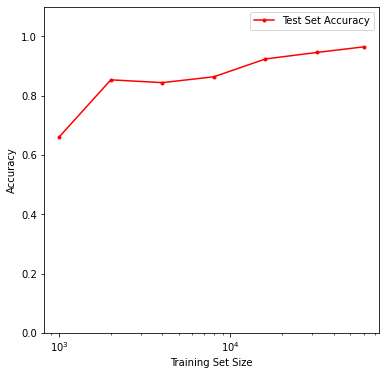

In [12]:
plt.figure(figsize=(6,6))
plt.plot(train_intervals,test_acc,'r.-',label='Test Set Accuracy')
ax =plt.gca()
#ax.set_xlim(0,epochs+1)
ax.set_ylim(0,1.1)
ax.set_xlabel("Training Set Size")
ax.set_ylabel("Accuracy")
plt.legend()
plt.xscale("log")
plt.savefig("homemade_learning.png")

In [277]:
# Create pytorch model for MNIST
mnist_trainset = datasets.MNIST(root='data',train=True,download=True,transform=torchvision.transforms.ToTensor())
mnist_testset = datasets.MNIST(root='data',train=False,download=True,transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(mnist_trainset,batch_size=50,shuffle=True) 
test_loader = torch.utils.data.DataLoader(mnist_testset,batch_size=1,shuffle=False)
train_iterator = iter(train_loader)
test_iterator = iter(test_loader)

d = 784
d1 = 300
d2 = 200
k = 10 
train_intervals = [1000,2000,4000,8000,16000,32000,60000]
np_train = np.array(train_intervals)

In [285]:
# 3-3
pytorch_acc= []
# Single training epoch
for interval in np_train/50:
    print("current interval: ",interval*50, "training points")
    # Initialize network
    pytorch_nn = torch.nn.Sequential(
            torch.nn.Linear(d,d1), torch.nn.Sigmoid(),
            torch.nn.Linear(d1,d2), torch.nn.Sigmoid(),
            torch.nn.Linear(d2,k)
            )
    opt = torch.optim.SGD(pytorch_nn.parameters(), lr=0.1)
    loss_fcn=torch.nn.CrossEntropyLoss()
    # Run an initial evaluation
    # correct=0
    # for raw_test_image,test_label in test_loader:
    #     flat_test_image = raw_test_image.flatten(start_dim=1)
    #     with torch.no_grad():
    #         pred=np.argmax(softmax(pytorch_nn(flat_test_image).numpy()[0]))
    #         if pred==test_label.item():
    #             correct+=1
    #print("initial correct",correct)

    # Train for a series of epochs
    for epoch in range(10):
        for i,(raw_images,labels) in enumerate(train_loader):
            flat_images = raw_images.flatten(start_dim=1)
            opt.zero_grad()
            preds = pytorch_nn(flat_images)
            loss = loss_fcn(preds,labels)
            loss.backward()
            opt.step()
            if (i+1)==interval:
                break
            #running_loss+=loss.item()
            #loss_list.append(running_loss)

    # plt.figure(figsize=(6,6))
    # plt.plot(list(range(1200)),loss_list,'r.-')
    # ax =plt.gca()
    # #ax.set_xlim(0,epochs+1)
    # #ax.set_ylim(0,1.1)
    # ax.set_xlabel("Iteration")
    # ax.set_ylabel("Loss")
    correct=0
    for raw_test_image,test_label in test_loader:
        flat_test_image = raw_test_image.flatten(start_dim=1)
        with torch.no_grad():
            pred=np.argmax(softmax(pytorch_nn(flat_test_image).numpy()[0]))
            if pred==test_label.item():
                correct+=1
    pytorch_acc.append(correct/10000)
    print("acc: ",correct/10000)
        #print("epoch: ",epoch, "correct: ",correct)

current interval:  1000.0 training points
acc:  0.0982
current interval:  2000.0 training points
acc:  0.1163
current interval:  4000.0 training points
acc:  0.6014
current interval:  8000.0 training points
acc:  0.831
current interval:  16000.0 training points
acc:  0.8958
current interval:  32000.0 training points
acc:  0.9167
current interval:  60000.0 training points
acc:  0.9405


In [289]:
print(1-np.array(pytorch_acc))

[0.9018 0.8837 0.3986 0.169  0.1042 0.0833 0.0595]


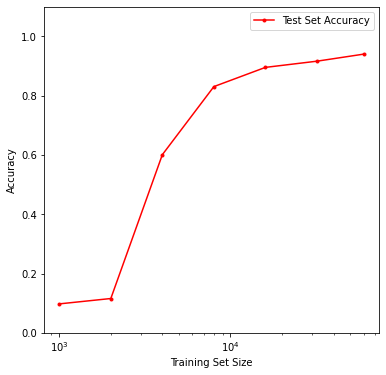

In [287]:
plt.figure(figsize=(6,6))
plt.plot(train_intervals,pytorch_acc,'r.-',label='Test Set Accuracy')
ax =plt.gca()
#ax.set_xlim(0,epochs+1)
ax.set_ylim(0,1.1)
ax.set_xlabel("Training Set Size")
ax.set_ylabel("Accuracy")
plt.legend()
plt.xscale("log")
plt.savefig("pytorch_learning.png")

In [296]:
# 3-4
pytorch_acc_0= []

def init_constant(a):
    if isinstance(a,torch.nn.Linear):
        torch.nn.init.constant_(a.weight,0)
        a.bias.data.fill_(0)

# Single training epoch
for interval in np_train/50:
    print("current interval: ",interval*50, "training points")
    # Initialize network
    pytorch_nn = torch.nn.Sequential(
            torch.nn.Linear(d,d1), torch.nn.Sigmoid(),
            torch.nn.Linear(d1,d2), torch.nn.Sigmoid(),
            torch.nn.Linear(d2,k)
            )
    pytorch_nn.apply(init_constant)
    opt = torch.optim.SGD(pytorch_nn.parameters(), lr=0.1)
    loss_fcn=torch.nn.CrossEntropyLoss()
    # Run an initial evaluation
    # correct=0
    # for raw_test_image,test_label in test_loader:
    #     flat_test_image = raw_test_image.flatten(start_dim=1)
    #     with torch.no_grad():
    #         pred=np.argmax(softmax(pytorch_nn(flat_test_image).numpy()[0]))
    #         if pred==test_label.item():
    #             correct+=1
    #print("initial correct",correct)

    # Train for a series of epochs
    for epoch in range(10):
        for i,(raw_images,labels) in enumerate(train_loader):
            flat_images = raw_images.flatten(start_dim=1)
            opt.zero_grad()
            preds = pytorch_nn(flat_images)
            loss = loss_fcn(preds,labels)
            loss.backward()
            opt.step()
            if (i+1)==interval:
                break
            #running_loss+=loss.item()
            #loss_list.append(running_loss)

    # plt.figure(figsize=(6,6))
    # plt.plot(list(range(1200)),loss_list,'r.-')
    # ax =plt.gca()
    # #ax.set_xlim(0,epochs+1)
    # #ax.set_ylim(0,1.1)
    # ax.set_xlabel("Iteration")
    # ax.set_ylabel("Loss")
    correct=0
    for raw_test_image,test_label in test_loader:
        flat_test_image = raw_test_image.flatten(start_dim=1)
        with torch.no_grad():
            pred=np.argmax(softmax(pytorch_nn(flat_test_image).numpy()[0]))
            if pred==test_label.item():
                correct+=1
    pytorch_acc_0.append(correct/10000)
    print("acc: ",correct/10000)
        #print("epoch: ",epoch, "correct: ",correct)

current interval:  1000.0 training points
acc:  0.0958
current interval:  2000.0 training points
acc:  0.0958
current interval:  4000.0 training points
acc:  0.1032
current interval:  8000.0 training points
acc:  0.0958
current interval:  16000.0 training points
acc:  0.2513
current interval:  32000.0 training points
acc:  0.3532
current interval:  60000.0 training points
acc:  0.3851


In [297]:
pytorch_acc_u= []

def init_uni(a):
    if isinstance(a,torch.nn.Linear):
        torch.nn.init.uniform_(a.weight,-1,1)

for interval in np_train/50:
    print("current interval: ",interval*50, "training points")
    # Initialize network
    pytorch_nn = torch.nn.Sequential(
            torch.nn.Linear(d,d1), torch.nn.Sigmoid(),
            torch.nn.Linear(d1,d2), torch.nn.Sigmoid(),
            torch.nn.Linear(d2,k)
            )
    pytorch_nn.apply(init_uni)
    opt = torch.optim.SGD(pytorch_nn.parameters(), lr=0.1)
    loss_fcn=torch.nn.CrossEntropyLoss()

    # Train for a series of epochs
    for epoch in range(10):
        for i,(raw_images,labels) in enumerate(train_loader):
            flat_images = raw_images.flatten(start_dim=1)
            opt.zero_grad()
            preds = pytorch_nn(flat_images)
            loss = loss_fcn(preds,labels)
            loss.backward()
            opt.step()
            if (i+1)==interval:
                break
    correct=0
    for raw_test_image,test_label in test_loader:
        flat_test_image = raw_test_image.flatten(start_dim=1)
        with torch.no_grad():
            pred=np.argmax(softmax(pytorch_nn(flat_test_image).numpy()[0]))
            if pred==test_label.item():
                correct+=1
    pytorch_acc_u.append(correct/10000)
    print("acc: ",correct/10000)

current interval:  1000.0 training points
acc:  0.7354
current interval:  2000.0 training points
acc:  0.822
current interval:  4000.0 training points
acc:  0.863
current interval:  8000.0 training points
acc:  0.8941
current interval:  16000.0 training points
acc:  0.918
current interval:  32000.0 training points
acc:  0.9332
current interval:  60000.0 training points
acc:  0.9446


[0.9042 0.9042 0.8968 0.9042 0.7487 0.6468 0.6149]
[0.2646 0.178  0.137  0.1059 0.082  0.0668 0.0554]


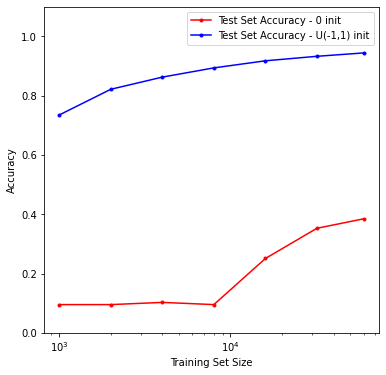

In [298]:
print(1-np.array(pytorch_acc_0))
print(1-np.array(pytorch_acc_u))
plt.figure(figsize=(6,6))
plt.plot(train_intervals,pytorch_acc_0,'r.-',label='Test Set Accuracy - 0 init')
plt.plot(train_intervals,pytorch_acc_u,'b.-',label='Test Set Accuracy - U(-1,1) init')
ax =plt.gca()
#ax.set_xlim(0,epochs+1)
ax.set_ylim(0,1.1)
ax.set_xlabel("Training Set Size")
ax.set_ylabel("Accuracy")
plt.legend()
plt.xscale("log")
plt.savefig("pytorch_learning_weight.png")